## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [81]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [82]:
filename = './images/lena-grey.bmp'
lena_im = io.imread(filename)
lena_nearest = misc.imresize(lena_im, 20, interp='nearest') #the size of an output image is now 20 times less
lena_bilinear = misc.imresize(lena_im, 20, interp='bilinear')
lena_bicubic = misc.imresize(lena_im, 20, interp='bicubic')

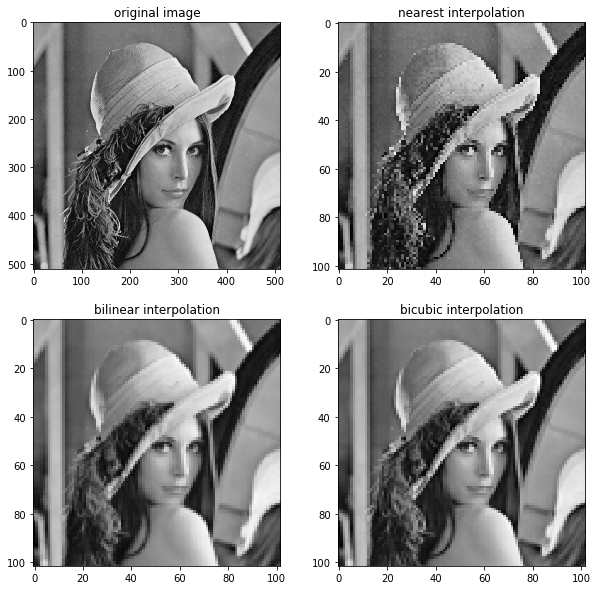

In [83]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3= axes.ravel()
ax0.imshow(lena_im, cmap=cm.gray)
ax0.set_title('original image')
ax1.imshow(lena_nearest, cmap=cm.gray)
ax1.set_title('nearest interpolation')
ax2.imshow(lena_bilinear, cmap=cm.gray)
ax2.set_title('bilinear interpolation')
ax3.imshow(lena_bicubic, cmap=cm.gray)
ax3.set_title('bicubic interpolation')

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


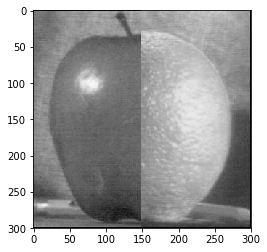

In [84]:
def simple_blend(img1, img2):

    img = np.zeros(np.shape(img1))*2 #new array of the same size as first picture.
    for i in range(0, img2.shape[0]-1): #copy the img2 into new img
        for j in range(0, img2.shape[1]-1):
            img[i,j]=img2[i,j]
    for i in range(0, (img1.shape[0]-1)): 
        for j in range(0, (img1.shape[1]-1)/2):
            img[i,j]=img1[i,j]
    return img

from skimage.color import rgb2gray
filename = './images/apple.jpeg'
apple_im = io.imread(filename)
apple_gray=rgb2gray(apple_im) #convert color and type of an image to use function "cont_str"
apple_gray=img_as_ubyte(apple_gray)

filename = './images/orange.jpeg'
orange_im = io.imread(filename)
orange_gray=rgb2gray(orange_im) #convert color and type of an image to use function "cont_str"
orange_gray=img_as_ubyte(orange_gray)


                       
blend_img = simple_blend(apple_gray, orange_gray)

plt.imshow(blend_img, cmap=cm.gray)



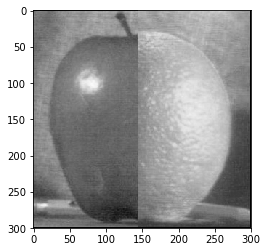

In [98]:
def alpha_blend(img1, img2):
    a = 0.1 #we need a range of values, not one number
    img = simple_blend(img1, img2)
    for i in range(0, img.shape[0]-1):
        for j in range(img.shape[1]-155, img.shape[1]-145): #put correct range, set a as a function!
            img[i,j]= a*img1[i,j] + (1-a)*img2[i,j]
    return img         

blend_img = alpha_blend(apple_gray, orange_gray)

plt.imshow(blend_img, cmap = cm.gray)
